## Description

In [ ]:
#   Dataset: From ：The first line of data from top400seq.txt.
#            Size ：679 numbers of float
#            Desc ：Every number represents the time of every company's being acquired Sequentially.
#            FYI  ：https://github.com/wangxiaodui/wanglianxiao/blob/master/top400seq.txt

In [ ]:
#   Motivation: Predict the time of the next company to be acquired

In [ ]:
#   Tools: keras ：build and train model
#          numpy ：process data as array
#          pandas ：Read data
#          matplotlib ：draw data graph

In [ ]:
#   Result: build a lstm model for the data with a loss of 8.2519e-06

In [1]:
#load data
import pandas
dataset = pandas.read_csv('top400seq.txt', delim_whitespace=True, nrows=1, index_col=None, header=None)
print(dataset)

        0         1         2         3         4         5         6    \
0  0.046575  0.654795  1.035616  1.254795  1.345205  1.731507  2.134247   

        7         8         9      ...            669        670        671  \
0  2.139726  2.161644  2.210959    ...      14.194521  14.219178  14.232877   

         672        673        674        675        676        677        678  
0  14.254795  14.254795  14.254795  14.254795  14.254795  14.254795  14.257534  

[1 rows x 679 columns]


In [2]:
#change data form from[1,679] to[679,1]
import numpy
dataset =numpy.array(dataset)
print(dataset.shape)

(1, 679)


In [3]:
dataset=numpy.reshape(dataset,(679,1),)
print(dataset.shape)

(679, 1)


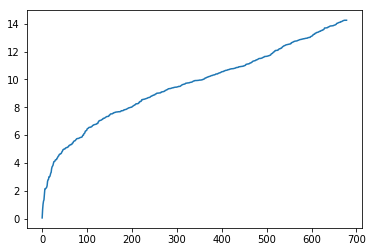

In [4]:
import matplotlib.pyplot as plt
plt.plot(dataset)
plt.show()

In [5]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [6]:
dataset = dataset.astype('float32')

In [7]:
# normalize the dataset making to between[0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# print(dataset)

In [8]:
# split into train and test sets of 67% and 33%
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

454 225


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [11]:
print(len(trainX))
print(len(testX))

452
223


In [12]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [13]:
# create and fit the LSTM network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

Using TensorFlow backend.


Epoch 1/100
5s - loss: 0.0628
Epoch 2/100
4s - loss: 0.0074
Epoch 3/100
4s - loss: 0.0048
Epoch 4/100
4s - loss: 0.0025
Epoch 5/100
4s - loss: 0.0010
Epoch 6/100
4s - loss: 2.7106e-04
Epoch 7/100
4s - loss: 5.7580e-05
Epoch 8/100
4s - loss: 2.3350e-05
Epoch 9/100
4s - loss: 2.0180e-05
Epoch 10/100
4s - loss: 1.9436e-05
Epoch 11/100
3s - loss: 1.8548e-05
Epoch 12/100
4s - loss: 1.6285e-05
Epoch 13/100
4s - loss: 1.5434e-05
Epoch 14/100
4s - loss: 1.4017e-05
Epoch 15/100
4s - loss: 1.3318e-05
Epoch 16/100
4s - loss: 1.1417e-05
Epoch 17/100
4s - loss: 1.0872e-05
Epoch 18/100
4s - loss: 9.1492e-06
Epoch 19/100
4s - loss: 9.6860e-06
Epoch 20/100
4s - loss: 8.7291e-06
Epoch 21/100
4s - loss: 9.4046e-06
Epoch 22/100
4s - loss: 8.0082e-06
Epoch 23/100
4s - loss: 8.3760e-06
Epoch 24/100
4s - loss: 8.7118e-06
Epoch 25/100
4s - loss: 8.0222e-06
Epoch 26/100
4s - loss: 9.0546e-06
Epoch 27/100
4s - loss: 8.9590e-06
Epoch 28/100
4s - loss: 9.1554e-06
Epoch 29/100
4s - loss: 7.7210e-06
Epoch 30/100
4

In [14]:
import math
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
from sklearn.metrics import mean_squared_error
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.03 RMSE
Test Score: 0.13 RMSE


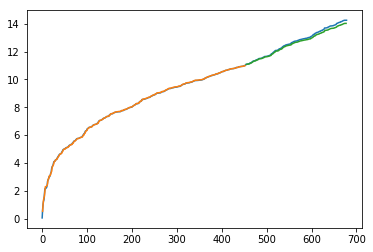

In [15]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()